# Authorship

A notebook that explores authorship.

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [1]:
# install libraries
!pip install -r ../requirements.txt

# import libraries
import visualising_poetry.data as vpd
import visualising_poetry.plot as vpp
import visualising_poetry.widgets as vpw
import ipywidgets as widgets
from IPython.display import display, HTML

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

## Authorship and number of poems

The following table shows authors who have been attributed to the authorship of twenty or more poems

In [2]:
authors = vpd.authorship_overview_df(df)
authors_20 = authors[authors['Total Poems'] >= 20]
display(HTML(authors_20.to_html()))

,Author,Total Poems
0,"Cibber, Colley",82
1,"Pope, Alexander",76
2,"Garrick, David",60
3,"Price, Henry",47
4,"Smart, Christopher",41
5,"Whitehead, William",39
6,"Dinsdale, Joshua",39
7,"Leapor, Mary",39
8,"Milton, John",30
9,"Jones, Mary",28


## Numbers of authors attributed to poems

The following scatter plot breaks down the number of authors attributed to poems. We can see
the majority are only attributed to a single poem, with a long tail of authors attributed
to multiple poems.

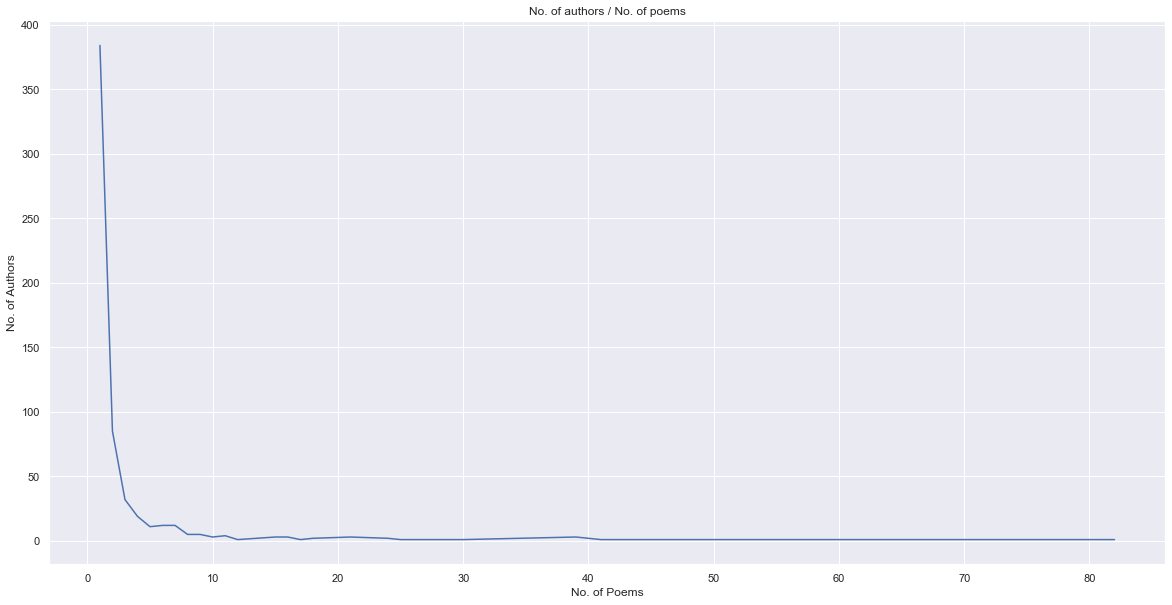

In [3]:
authors_poems = vpd.authorship_poems_overview_df(df)
vpp.author_poems_plot(authors_poems)

## Authors and publications

The following heat map shows the number of times authors were printed in publications.
The authors has been limited to those who have been published 20 or more times.

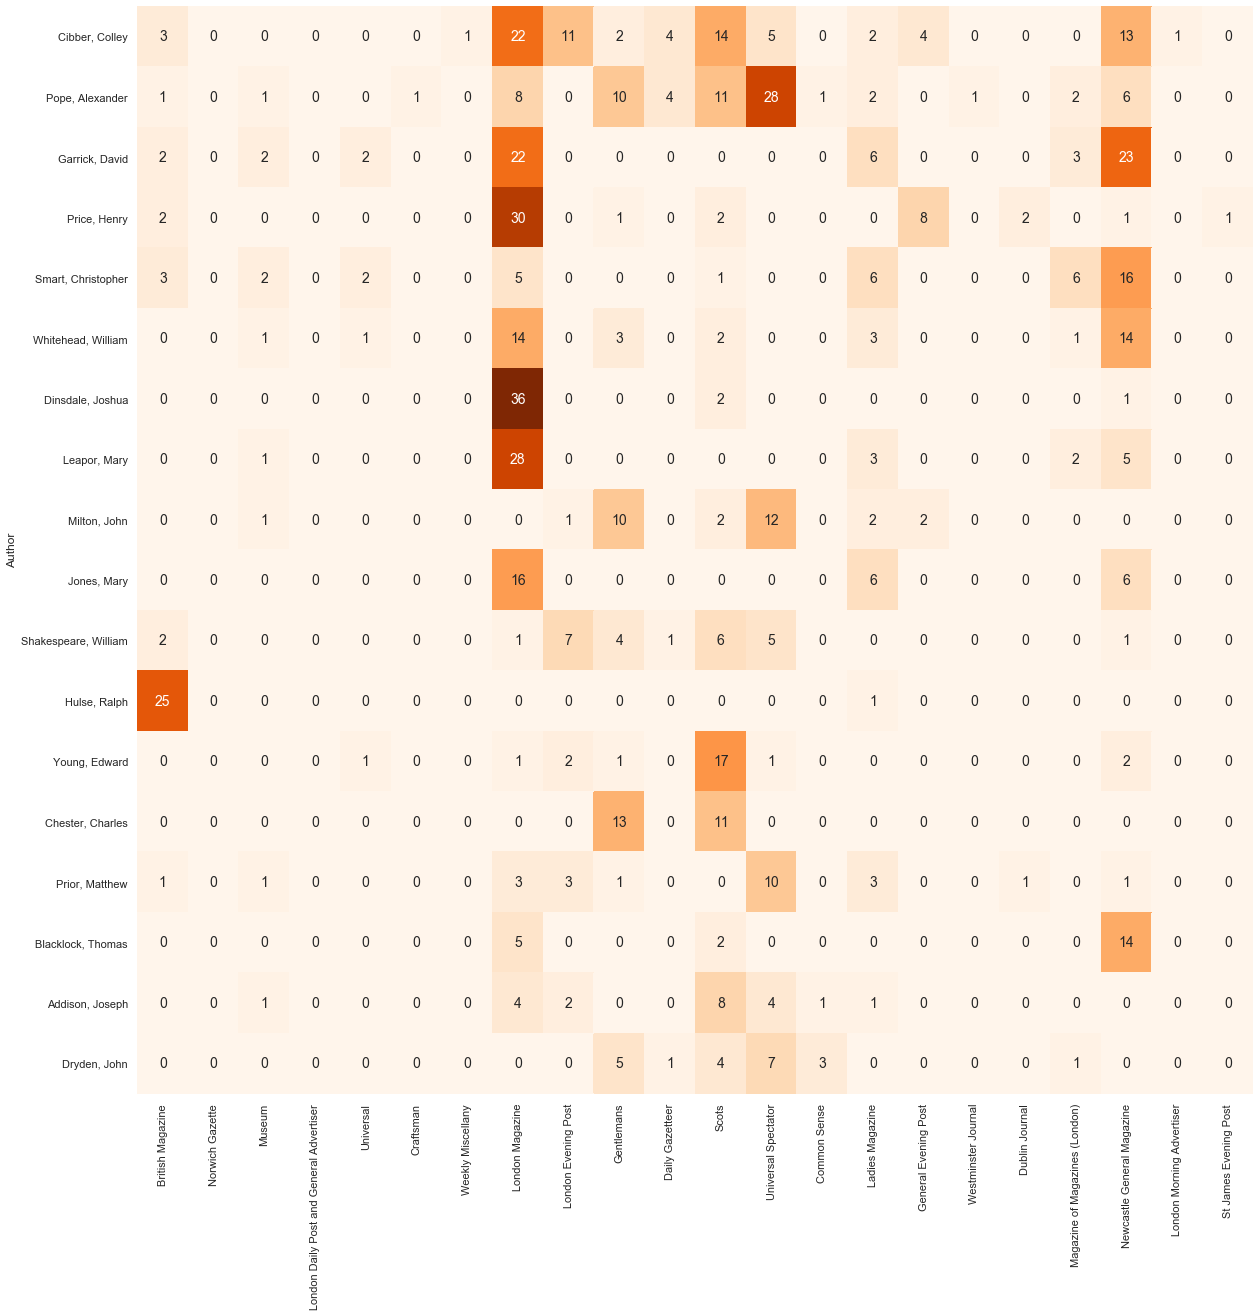

In [4]:
author_pubs = vpd.authorship_publications_overview_df(df)
vpp.authorship_publications_overview_plot(author_pubs)